In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.cross_decomposition import CCA

In [11]:
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel("data_reduce_filled.xlsx")

In [3]:
category_values = ['H', 'UM', 'LM', 'L']

category_order = CategoricalDtype(category_values, ordered=True)

data.loc[:,'Income Group'] = data.loc[:,'Income Group'].astype(category_order)

In [4]:
data['Income Group'].unique()

['L', 'UM', 'LM', 'H']
Categories (4, object): ['H' < 'UM' < 'LM' < 'L']

In [5]:
# Polllution variables

pollution = [
    'Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]',
    'Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]',
    'Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]',

    'Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
    'Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]',
    'Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]',

    'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]',

    'Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]',

    'CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD]',

    'Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE]',
    'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE]',

    'Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE]',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE]',

    'Energy intensity level of primary energy (MJ/$2017 PPP GDP) [EG.EGY.PRIM.PP.KD]',
    'Carbon intensity of electricity (gCO2/kWh)'
]

In [6]:

#economics variables
economics = [
    'Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]',
    'Employers, total (% of total employment) (modeled ILO estimate) [SL.EMP.MPYR.ZS]',
    'Exports of goods and services (current US$) [NE.EXP.GNFS.CD]',
    'Imports of goods and services (current US$) [NE.IMP.GNFS.CD]',
    'Final consumption expenditure (current US$) [NE.CON.TOTL.CD]',
    'GDP, PPP (constant 2017 international $) [NY.GDP.MKTP.PP.KD]',
    'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
    'GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]',
    'Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]',
    'Population, total [SP.POP.TOTL]',
    'Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]',
]


In [12]:
scaler = StandardScaler()

In [13]:
X = data[pollution]
Y = data[economics]
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

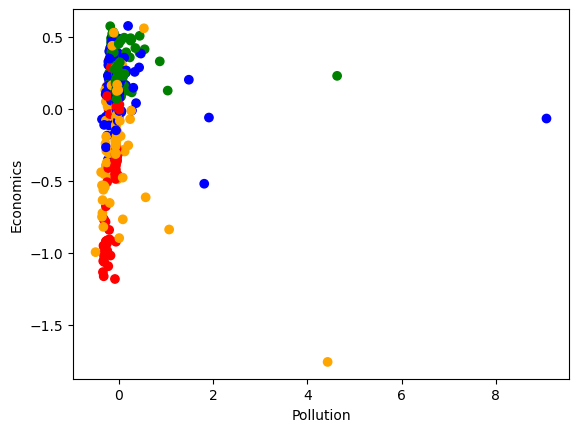

In [14]:
import pandas as pd
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt

# Separate the Income Group variable
income_group = data['Income Group']

# Fit the CCA model
cca = CCA(n_components=2)
cca.fit(X_scaled, Y_scaled)

# Get the canonical correlations and canonical weights
#ccorrs = cca.correlations_
cweights_x = cca.x_weights_
cweights_y = cca.y_weights_

# Project the data onto the canonical space
x_c, y_c = cca.transform(X_scaled, Y_scaled)

# Visualize the results
plt.scatter(x_c[:, 0], x_c[:, 1], c=income_group.map({'L': 'red', 'UM': 'blue', 'H': 'green', 'LM': 'orange'}))
plt.scatter(y_c[:, 0], y_c[:, 1], c=income_group.map({'L': 'red', 'UM': 'blue', 'H': 'green', 'LM': 'orange'}))
plt.xlabel('Pollution')
plt.ylabel('Economics')
plt.show()
#a scatter plot of the data projected onto the two canonical components, with the points colored according to the Income Group variable.

